In [3]:
import numpy as np
import random
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def create_feature_sets_and_labels(test_size = 0.3):

    # known patterns (5 features) output of [1] of positions [0,4]==1
    features = []
    features.append([[0, 0, 0, 0, 0], [0,1]])
    features.append([[0, 0, 0, 0, 1], [0,1]])
    features.append([[0, 0, 0, 1, 1], [0,1]])
    features.append([[0, 0, 1, 1, 1], [0,1]])
    features.append([[0, 1, 1, 1, 1], [0,1]])
    features.append([[1, 1, 1, 1, 0], [0,1]])
    features.append([[1, 1, 1, 0, 0], [0,1]])
    features.append([[1, 1, 0, 0, 0], [0,1]])
    features.append([[1, 0, 0, 0, 0], [0,1]])
    features.append([[1, 0, 0, 1, 0], [0,1]])
    features.append([[1, 0, 1, 1, 0], [0,1]])
    features.append([[1, 1, 0, 1, 0], [0,1]])
    features.append([[0, 1, 0, 1, 1], [0,1]])
    features.append([[0, 0, 1, 0, 1], [0,1]])
    features.append([[1, 0, 1, 1, 1], [1,0]])
    features.append([[1, 1, 0, 1, 1], [1,0]])
    features.append([[1, 0, 1, 0, 1], [1,0]])
    features.append([[1, 0, 0, 0, 1], [1,0]])
    features.append([[1, 1, 0, 0, 1], [1,0]])
    features.append([[1, 1, 1, 0, 1], [1,0]])
    features.append([[1, 1, 1, 1, 1], [1,0]])
    features.append([[1, 0, 0, 1, 1], [1,0]])

    # shuffle out features and turn into np.array
    random.shuffle(features)
    features = np.array(features)

    # split a portion of the features into tests
    testing_size = int(test_size*len(features))

    # create train and test lists
    train_x = list(features[:,0][:-testing_size])
    train_y = list(features[:,1][:-testing_size])
    test_x = list(features[:,0][-testing_size:])
    test_y = list(features[:,1][-testing_size:])

    return train_x, train_y, test_x, test_y

In [6]:
train_x, train_y, test_x, test_y = create_feature_sets_and_labels()

x = tf.placeholder('float')
y = tf.placeholder('float')

# classes in our output
n_classes = 2
# iterations and batch-size to build out model
epochs = 2000
batch_size = 4
# Define Artificial Neural Network
def ann_model(data):
    # Input Layer
    input_layer = tf.reshape(data, [-1, 5])
    
    # First Hidden Layer
    hidden_layer_1 = tf.layers.dense(inputs=input_layer,
                                    units=20,
                                    activation=tf.sigmoid)
    # Second Hidden Layer
    hidden_layer_2 = tf.layers.dense(inputs=hidden_layer_1,
                                    units=20,
                                    activation=tf.sigmoid)
    # Output Layer
    output_layer = tf.layers.dense(inputs=hidden_layer_2,
                                  units=2,
                                  activation=None)
    return output_layer

def train_neural_network(x):
    prediction = ann_model(x)

    # formula for cost (error)
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y) )

    # optimize for cost using GradientDescent
    optimizer = tf.train.GradientDescentOptimizer(1).minimize(cost)

    with tf.Session() as sess:
        summary_writer = tf.summary.FileWriter('log_ANN_graph', sess.graph)
        # initialize our variables
        sess.run(tf.global_variables_initializer())

        # loop through specified number of iterations
        for epoch in range(epochs):
            epoch_loss = 0
            i=0
            # handle batch sized chunks of training data
            while i < len(train_x):
                start = i
                end = i+batch_size
                batch_x = np.array(train_x[start:end])
                batch_y = np.array(train_y[start:end])

                _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})
                epoch_loss += c
                i+=batch_size
                last_cost = c

            # print cost updates along the way
            if (epoch% (epochs/5)) == 0:
                print('Epoch', epoch, 'completed out of',epochs,'cost:', last_cost)
        
        # print accuracy of our model
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print('Accuracy:',accuracy.eval({x:test_x, y:test_y}))

        #output_weight = sess.run(output_layer['weight'])
        #output_bias = sess.run(output_layer['bias'])
        
        # print predictions using our model
        for i,t in enumerate(test_x):
            print ('prediction for:', test_x[i])
            output = prediction.eval(feed_dict = {x: [test_x[i]]})
            # normalize the prediction values
            print(tf.sigmoid(output[0][0]).eval(), tf.sigmoid(output[0][1]).eval())
    
train_neural_network(x)

Shape of Data : <unknown>
('Epoch', 0, 'completed out of', 1000, 'cost:', 0.96334022)
('Epoch', 200, 'completed out of', 1000, 'cost:', 0.00081153068)
('Epoch', 400, 'completed out of', 1000, 'cost:', 0.00030233618)
('Epoch', 600, 'completed out of', 1000, 'cost:', 0.00018004152)
('Epoch', 800, 'completed out of', 1000, 'cost:', 0.00012655855)
('Accuracy:', 1.0)
('prediction for:', [1, 0, 1, 1, 1])
(0.99015546, 0.025773348)
('prediction for:', [1, 1, 1, 0, 1])
(0.99166858, 0.021512832)
('prediction for:', [1, 1, 1, 0, 0])
(0.022831306, 0.99505121)
('prediction for:', [1, 1, 1, 1, 0])
(0.015568913, 0.99678802)
('prediction for:', [0, 0, 0, 1, 1])
(0.018367682, 0.99638593)
('prediction for:', [0, 0, 1, 0, 1])
(0.029929532, 0.99373686)


In [49]:
# ANN Model to simulate Sine Function
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01, dtype=tf.float32))

def sine_ann_model(x):
    #input_layer
    input_layer = tf.reshape(x, [-1, 1])
    
    # hidden_layer_1
    hl1 = tf.layers.dense(inputs=input_layer,
                         units=8,
                          kernel_initializer=tf.contrib.layers.xavier_initializer(),
                         activation=tf.sigmoid)
    # output_layer
    output_layer = tf.layers.dense(inputs=hl1,
                                  units=1,
                                   kernel_initializer=tf.contrib.layers.xavier_initializer(),
                                  activation=tf.sigmoid)
    return output_layer

In [70]:
import math
def generate_sine_model_data(test_size = 0.3):
    dataset = []
    for x in np.arange(0, (math.pi), 0.01):
        dataset.append([[x], [math.sin(x)]])
        
    random.shuffle(dataset)
    dataset = np.array(dataset)

    # split a portion of the features into tests
    testing_size = int(test_size*len(dataset))

    # create train and test lists
    train_x = list(dataset[:,0][:-testing_size])
    train_y = list(dataset[:,1][:-testing_size])
    test_x = list(dataset[:,0][-testing_size:])
    test_y = list(dataset[:,1][-testing_size:])

    return train_x, train_y, test_x, test_y

train_x, train_y, test_x, test_y = generate_sine_model_data()

('Epoch', 0, 'completed out of', 2000, 'cost:', 0.050613612)
('Epoch', 400, 'completed out of', 2000, 'cost:', 4.3598069e-05)
('Epoch', 800, 'completed out of', 2000, 'cost:', 4.633524e-06)
('Epoch', 1200, 'completed out of', 2000, 'cost:', 2.9624052e-05)
('Epoch', 1600, 'completed out of', 2000, 'cost:', 4.4899309e-05)
('Accuracy:', 0.0002155472)


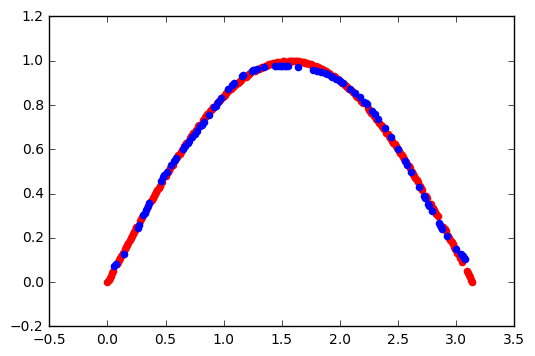

In [71]:
x = tf.placeholder('float')
y = tf.placeholder('float')
epochs = 2000
def train_ann_sine_function(x):
    prediction = sine_ann_model(x)
    
    cost = tf.reduce_mean(tf.square(prediction - y))
    
    optimizer = tf.train.GradientDescentOptimizer(1.0).minimize(cost)
    
    with tf.Session() as sess:
        summary_writer = tf.summary.FileWriter('log_ANN_graph', sess.graph)
        # initialize our variables
        sess.run(tf.global_variables_initializer())

        # loop through specified number of iterations
        for epoch in range(epochs):
            epoch_loss = 0
            i=0
            # handle batch sized chunks of training data
            while i < len(train_x):
                start = i
                end = i+batch_size
                batch_x = np.array(train_x[start:end])
                batch_y = np.array(train_y[start:end])

                _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})
                epoch_loss += c
                i+=batch_size
                last_cost = c

            # print cost updates along the way
            if (epoch% (epochs/5)) == 0:
                print('Epoch', epoch, 'completed out of',epochs,'cost:', last_cost)
        
        # print accuracy of our model
        accuracy = tf.reduce_mean(tf.square(prediction - y))
        print('Accuracy:',accuracy.eval({x:test_x, y:test_y}))

        #output_weight = sess.run(output_layer['weight'])
        #output_bias = sess.run(output_layer['bias'])
        
        # print predictions using our model
        test_pred = []
        for i,t in enumerate(test_x):
            output = prediction.eval(feed_dict = {x: [test_x[i]]})
            # normalize the prediction values
            test_pred.append(output[0][0])
        #plt.scatter(train_x, train_y, color='r')
        #plt.scatter(test_x, test_pred, color='b')
        #plt.show()
        
train_ann_sine_function(x)

In [57]:
plt.scatter(train_x, train_y, color='r')
plt.scatter(test_x, test_pred, color='b')
plt.show()

NameError: name 'test_pred' is not defined